# Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df = pd.read_csv("Data/BA_Reviews_processed.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallRating          3701 non-null   float64
 1   ReviewHeader           3701 non-null   object 
 2   Name                   3701 non-null   object 
 3   Datetime               3701 non-null   object 
 4   VerifiedReview         3701 non-null   bool   
 5   ReviewBody             3701 non-null   object 
 6   TypeOfTraveller        2930 non-null   object 
 7   SeatType               3699 non-null   object 
 8   Route                  2926 non-null   object 
 9   DateFlown              2923 non-null   object 
 10  SeatComfort            3701 non-null   float64
 11  CabinStaffService      3701 non-null   float64
 12  GroundService          3701 non-null   float64
 13  ValueForMoney          3701 non-null   float64
 14  Recommended            3701 non-null   object 
 15  Airc

In [22]:
def split_route(route):
    if str(route) == 'nan': 
        return None, None, None
    if route.count(' to ') > 1:
        stops = route.split(' to ')
        origin = stops[0]
        destination = stops[-1]
        via = ', '.join(stops[1:-1]) if len(stops) > 2 else stops[1]
        return origin, destination, via
    elif ' to ' in route:
        origin, destination = route.split(' to ')
        if ' via ' in destination:
            destination, via = destination.split(' via ')
        else:
            via = None
        return origin, destination, via
    elif '-' in route:
        origin, destination = route.split('-')
        return origin, destination, None

    
df[['Origin', 'Destination', 'Via']] = df['Route'].apply(lambda x: pd.Series(split_route(x)))

In [23]:
df.columns

Index(['OverallRating', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview',
       'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown',
       'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney',
       'Recommended', 'Aircraft', 'Food&Beverages', 'InflightEntertainment',
       'Origin', 'Destination', 'Via'],
      dtype='object')

In [24]:
# Replace 'None' with None for easier filtering
df['IsVia'] = ~df['Via'].isna()

# Group by 'Via' (None or not) and compute the average rating for each group
average_rating_by_route = df.groupby('IsVia')['OverallRating'].mean()
average_rating_by_route

IsVia
False    4.841842
True     4.051181
Name: OverallRating, dtype: float64

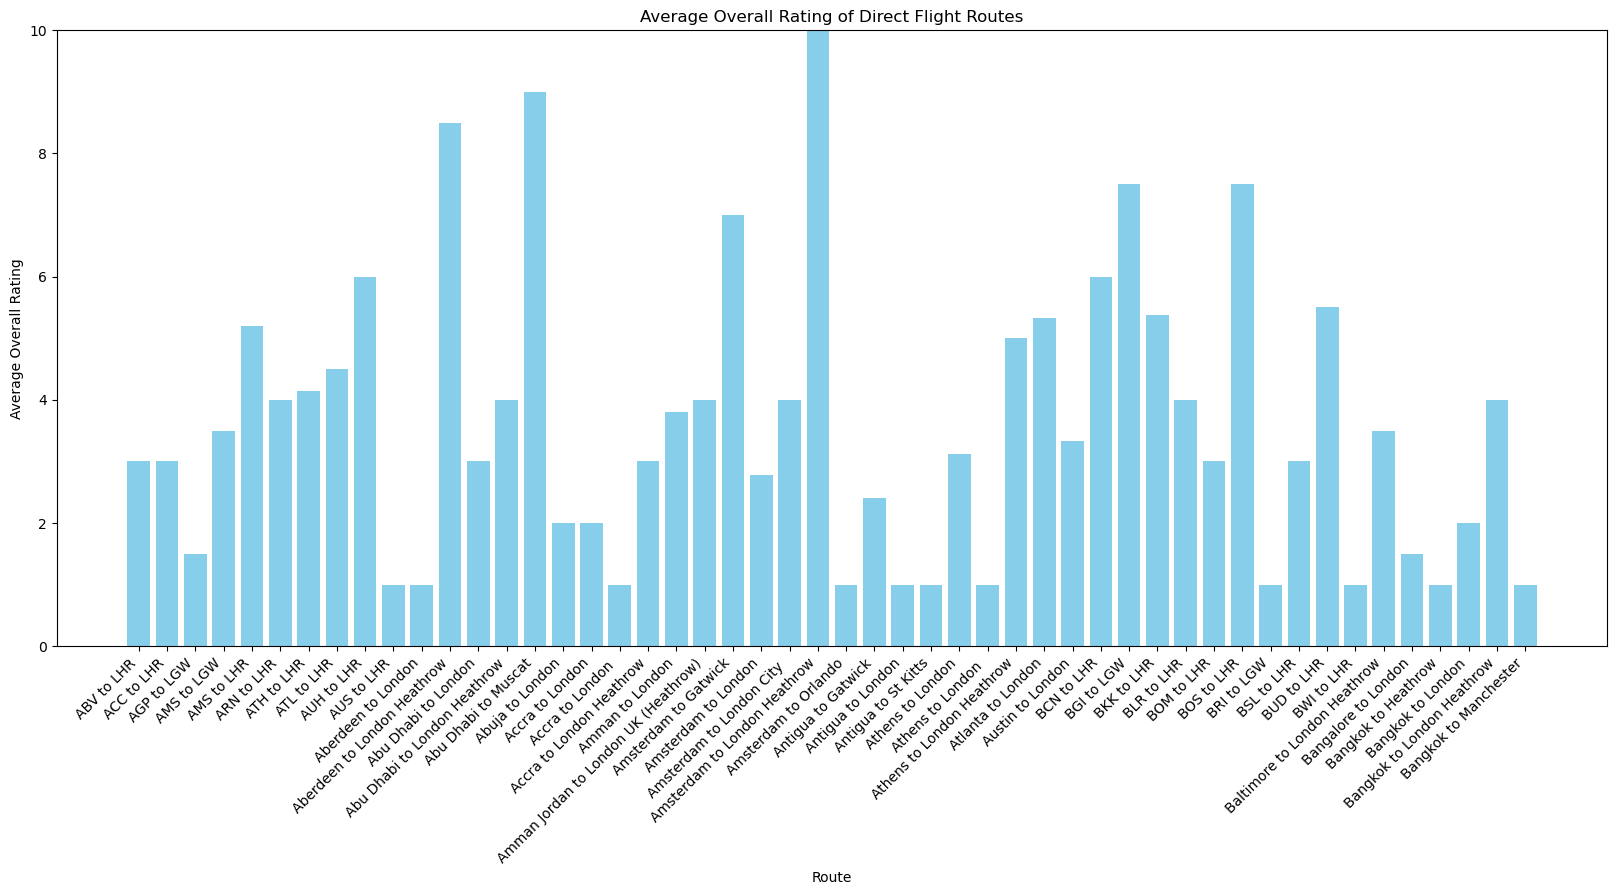

In [30]:
direct_flights = df[~df['IsVia']]

# Group by route and calculate the average rating for each route
average_rating_by_route = direct_flights.groupby(['Origin', 'Destination'])['OverallRating'].mean().reset_index().head(50)

# Plot the routes and their average ratings
plt.figure(figsize=(20, 8))
plt.bar(average_rating_by_route['Origin'] + ' to ' + average_rating_by_route['Destination'], average_rating_by_route['OverallRating'], color='skyblue')
plt.title('Average Overall Rating of Direct Flight Routes')
plt.xlabel('Route')
plt.ylabel('Average Overall Rating')
plt.ylim(0, 10)
plt.xticks(rotation=45, ha='right')
plt.show()